# 첫 번째 애플리케이션 : 붓꽃을 품종 분류

머신러닝을 통한 새로운 데이터의 품종 예측

[1] 데이터 적재

In [19]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [20]:
# Bunch 클래스의 키 값 확인 , keys()
print("iris_dataset의 키 :\n", iris_dataset.keys())

iris_dataset의 키 :
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
# iris 품종 종류 확인
print('타겟의 이름 :', iris_dataset['target_names'])

타겟의 이름 : ['setosa' 'versicolor' 'virginica']


In [22]:
# iris 특성 확인
print('특성의 이름 :', iris_dataset['feature_names'])

특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
# iris 자료 형태
print('data의 크기 :', iris_dataset['data'].shape)

data의 크기 : (150, 4)


[2] 데이터 분리

In [24]:
# train 데이터와 test 데이터로 , 크기를 지정해주지 않으면 자료의 75%, 25%로 나뉜다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 42
)

[3] 데이터 살펴보기

In [25]:
import pandas as pd
import numpy as np

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

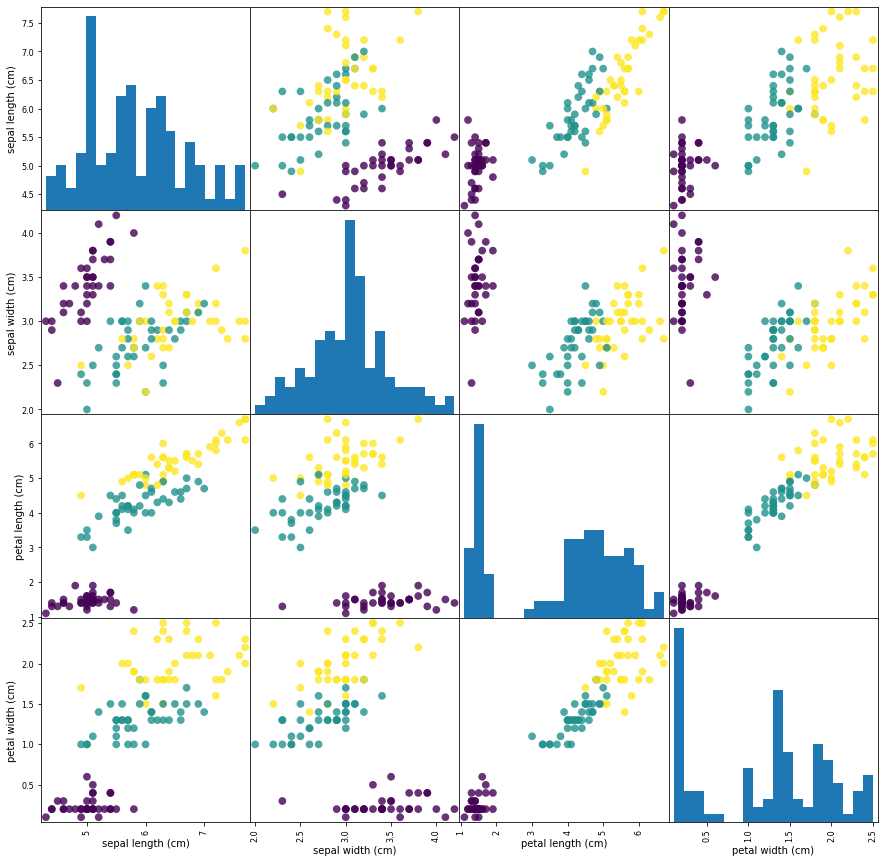

In [26]:
  # X_train 데이터를 사용해서 데이터프레임을 만듭니다.
  # 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
  
  iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

  # 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
  pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize=(15, 15), marker ='o',
  hist_kwds={'bins':20}, s= 60, alpha = .8)

[4] k-최근접 이웃 알고리즘

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# 근접값을 1로 지정하고 모델 생성
knn = KNeighborsClassifier(n_neighbors= 1)

# 모델 훈련
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

[5] 예측하기

In [28]:
# 새로운 변수 설정
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape", X_new.shape)

X_new.shape (1, 4)


In [29]:
# 모델 예측
prediction = knn.predict(X_new)
print('예측 :', prediction)
print('예측한 타깃의 이름 :', iris_dataset['target_names'][prediction])

예측 : [0]
예측한 타깃의 이름 : ['setosa']


[6] 모델 평가하기

In [30]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값 :", y_pred)

테스트 세트에 대한 예측값 : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [31]:
print('테스트 세트의 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))

테스트 세트의 정확도 : 1.00


In [32]:
print('테스트 세트의 정확도 : {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도 : 1.00


### 요약 정리
- 데이터를 훈련 세트와 테스트 세트로 나눔
- 모델을 설정하고 훈련 세트로 모델 훈련
- 모델의 점수를 평가하여 모델 튜닝